# MICRO CREDIT DEFAULTER PROJECT

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from scipy.stats import zscore

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, roc_curve, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_excel('C:\\Users\Dell\Desktop\Files\Data file.xlsx')
data.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [3]:
data.shape

(209593, 37)

In [4]:
data.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [5]:
data.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

There are no null values in the dataset.

In [6]:
data.dtypes

Unnamed: 0                       int64
label                            int64
msisdn                          object
aon                            float64
daily_decr30                   float64
daily_decr90                   float64
rental30                       float64
rental90                       float64
last_rech_date_ma              float64
last_rech_date_da              float64
last_rech_amt_ma                 int64
cnt_ma_rech30                    int64
fr_ma_rech30                   float64
sumamnt_ma_rech30                int64
medianamnt_ma_rech30           float64
medianmarechprebal30           float64
cnt_ma_rech90                    int64
fr_ma_rech90                     int64
sumamnt_ma_rech90                int64
medianamnt_ma_rech90           float64
medianmarechprebal90           float64
cnt_da_rech30                  float64
fr_da_rech30                   float64
cnt_da_rech90                    int64
fr_da_rech90                     int64
cnt_loans30              

Two columns are object, one is of datetime and 34 columns are numerical in which 14 are integer & 20 are float.

# Data Cleaning

Unnamed: 0 is not a relevant column because it is just a serial number, so we drop this

In [7]:
data=data.drop(['Unnamed: 0'],axis=1)
data.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


                                     Feature Engineering

In [8]:
data['pdate']=pd.to_datetime(data['pdate'])
data['pday']=data['pdate'].dt.day
data['pmonth']=data['pdate'].dt.month
data['pyear']=data['pdate'].dt.year

In [9]:
data=data.drop(['pdate'],axis=1)
data.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pday,pmonth,pyear
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,2.0,12,6,0.0,29.000000,29.000000,UPW,20,7,2016
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,1.0,12,12,0.0,0.000000,0.000000,UPW,10,8,2016
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,1.0,6,6,0.0,0.000000,0.000000,UPW,19,8,2016
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,2.0,12,6,0.0,0.000000,0.000000,UPW,6,6,2016
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,7.0,42,6,0.0,2.333333,2.333333,UPW,22,6,2016


# Visualistaion

                                   Visualisation of continuous data

In [10]:
data_visualisation_continuous= data.drop(['msisdn','label','pcircle'],axis=1)
data_visualisation_continuous.columns

Index(['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90',
       'pday', 'pmonth', 'pyear'],
      dtype='object')

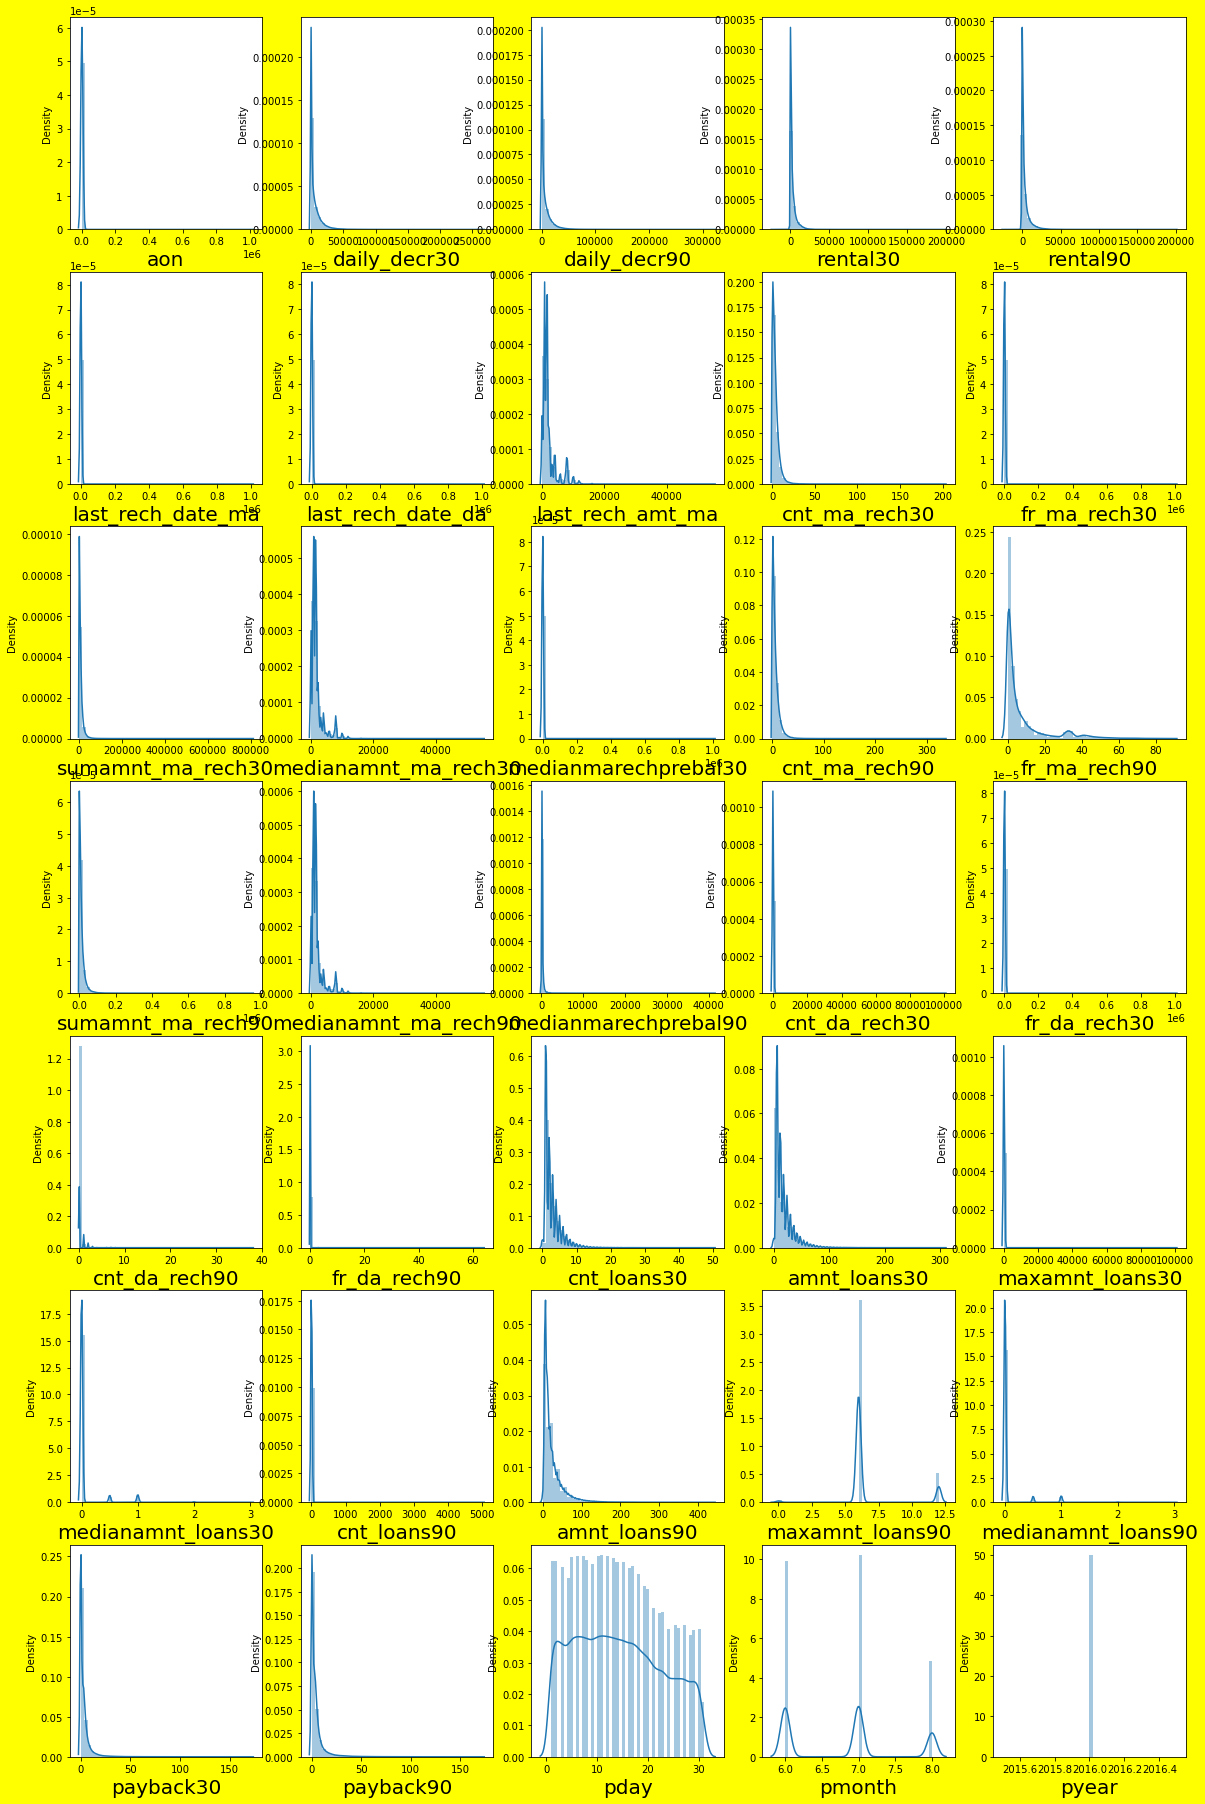

In [11]:
plt.figure(figsize=(20,32),facecolor = 'yellow')
plotnumber =1

for column in data_visualisation_continuous:
    if plotnumber <=35:
        ax = plt.subplot(7,5,plotnumber)
        sns.distplot(data_visualisation_continuous[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()   

                                 Visualisation of categorical data

In [12]:
data_visualisation_nominal= data[['msisdn','label','pcircle']].copy()
data_visualisation_nominal.columns

Index(['msisdn', 'label', 'pcircle'], dtype='object')

<AxesSubplot:xlabel='label', ylabel='count'>

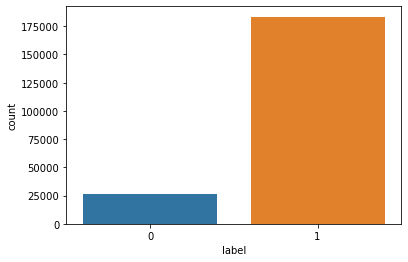

In [13]:
sns.countplot(data_visualisation_nominal['label'])         

In [14]:
data['label'].value_counts()

1    183431
0     26162
Name: label, dtype: int64

The label data is imbalance so we balancing the data by SMOTE technique while fiting the model

<AxesSubplot:xlabel='pcircle', ylabel='count'>

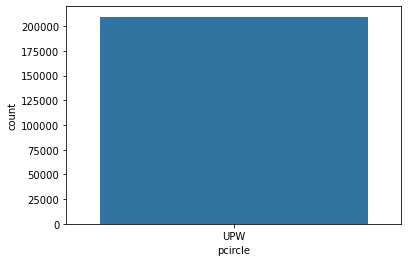

In [15]:
sns.countplot(data_visualisation_nominal['pcircle'])         

In two columns pyear and pcircle there are unique value, so it will not effect on our analysis and we can drop them.

In [16]:
data=data.drop(['pyear','pcircle'],axis=1)
data.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pday,pmonth
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,20,7
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,10,8
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,19,8
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,6,6
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,22,6


In [17]:
enc=OrdinalEncoder()

data['msisdn']=enc.fit_transform(data['msisdn'].values.reshape(-1,1))

In [18]:
data.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pday,pmonth
0,0,40191.0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,20,7
1,1,142291.0,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,10,8
2,1,33594.0,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,19,8
3,1,104157.0,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,6,6
4,1,6910.0,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,22,6


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  float64
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  int64  
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

# Analysis

In [20]:
data.describe()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pday,pmonth
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000
mean,0.875177,93100.650179,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,...,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485,14.39894,6.797321
std,0.330519,53758.461427,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,...,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108,8.43890,0.741435
min,0.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,6.000000
25%,1.000000,46506.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,...,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,7.00000,6.000000
50%,1.000000,93073.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,...,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667,14.00000,7.000000
75%,1.000000,139626.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,...,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000,21.00000,7.000000
max,1.000000,186242.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,...,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000,31.00000,8.000000


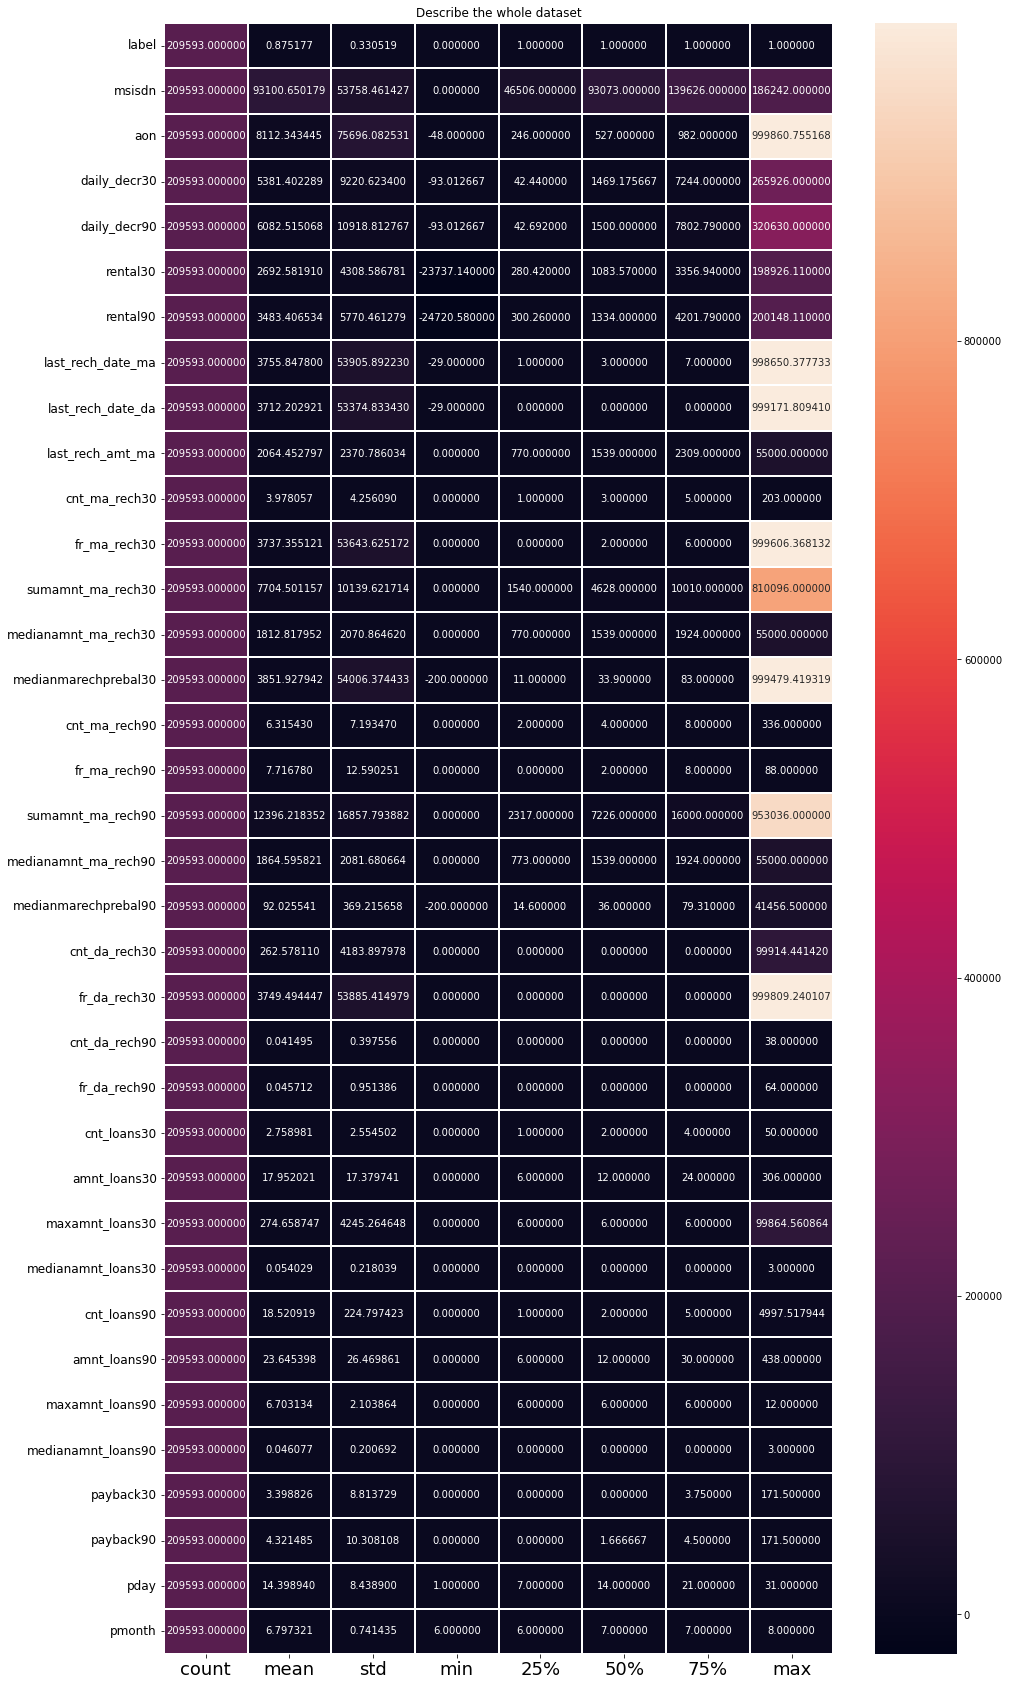

In [21]:
plt.figure(figsize=(15,30))
sns.heatmap(data.describe().transpose(),linewidth=2,annot=True,fmt='f')
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Describe the whole dataset")
plt.show()

                                                 Correlation

In [22]:
data.corr()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pday,pmonth
label,1.000000,0.001976,-0.003785,0.168298,0.166150,0.058085,0.075521,0.003728,0.001711,0.131804,...,0.000248,0.044589,0.004733,0.199788,0.084144,0.035747,0.048336,0.049183,0.006825,0.154949
msisdn,0.001976,1.000000,0.000566,0.000717,0.000950,-0.001404,-0.000691,-0.000928,0.001400,-0.002368,...,-0.000755,0.000986,0.001859,-0.000155,0.003286,0.001210,0.002922,0.002671,0.002466,-0.002986
aon,-0.003785,0.000566,1.000000,0.001104,0.000374,-0.000960,-0.000790,0.001692,-0.001693,0.004256,...,-0.002764,0.004664,-0.000611,-0.002319,-0.001191,0.002771,0.001940,0.002203,0.000662,-0.001863
daily_decr30,0.168298,0.000717,0.001104,1.000000,0.977704,0.442066,0.458977,0.000487,-0.001636,0.275837,...,-0.000028,-0.011610,0.008962,0.563496,0.400199,-0.037305,0.026915,0.047175,0.006477,0.518664
daily_decr90,0.166150,0.000950,0.000374,0.977704,1.000000,0.434685,0.471730,0.000908,-0.001886,0.264131,...,0.000025,-0.005591,0.009446,0.567204,0.397251,-0.034686,0.019400,0.040800,-0.021508,0.539410
rental30,0.058085,-0.001404,-0.000960,0.442066,0.434685,1.000000,0.955237,-0.001095,0.003261,0.127271,...,-0.000864,-0.016482,0.004012,0.298943,0.234211,-0.035489,0.072974,0.095147,0.036537,0.365699
rental90,0.075521,-0.000691,-0.000790,0.458977,0.471730,0.955237,1.000000,-0.001688,0.002794,0.121416,...,-0.001411,-0.009467,0.005141,0.327436,0.251029,-0.034122,0.067110,0.099501,0.008941,0.429407
last_rech_date_ma,0.003728,-0.000928,0.001692,0.000487,0.000908,-0.001095,-0.001688,1.000000,0.001790,-0.000147,...,0.000928,0.001835,-0.000225,0.000870,-0.001123,0.002771,-0.002233,-0.001583,0.000560,-0.001207
last_rech_date_da,0.001711,0.001400,-0.001693,-0.001636,-0.001886,0.003261,0.002794,0.001790,1.000000,-0.000149,...,0.000503,0.000061,-0.000972,0.000519,0.001524,-0.002239,0.000077,0.000417,0.000631,-0.001800
last_rech_amt_ma,0.131804,-0.002368,0.004256,0.275837,0.264131,0.127271,0.121416,-0.000147,-0.000149,1.000000,...,0.001000,0.028370,0.000093,0.014067,0.148460,0.021004,-0.027369,-0.014260,0.028883,0.096919


<AxesSubplot:>

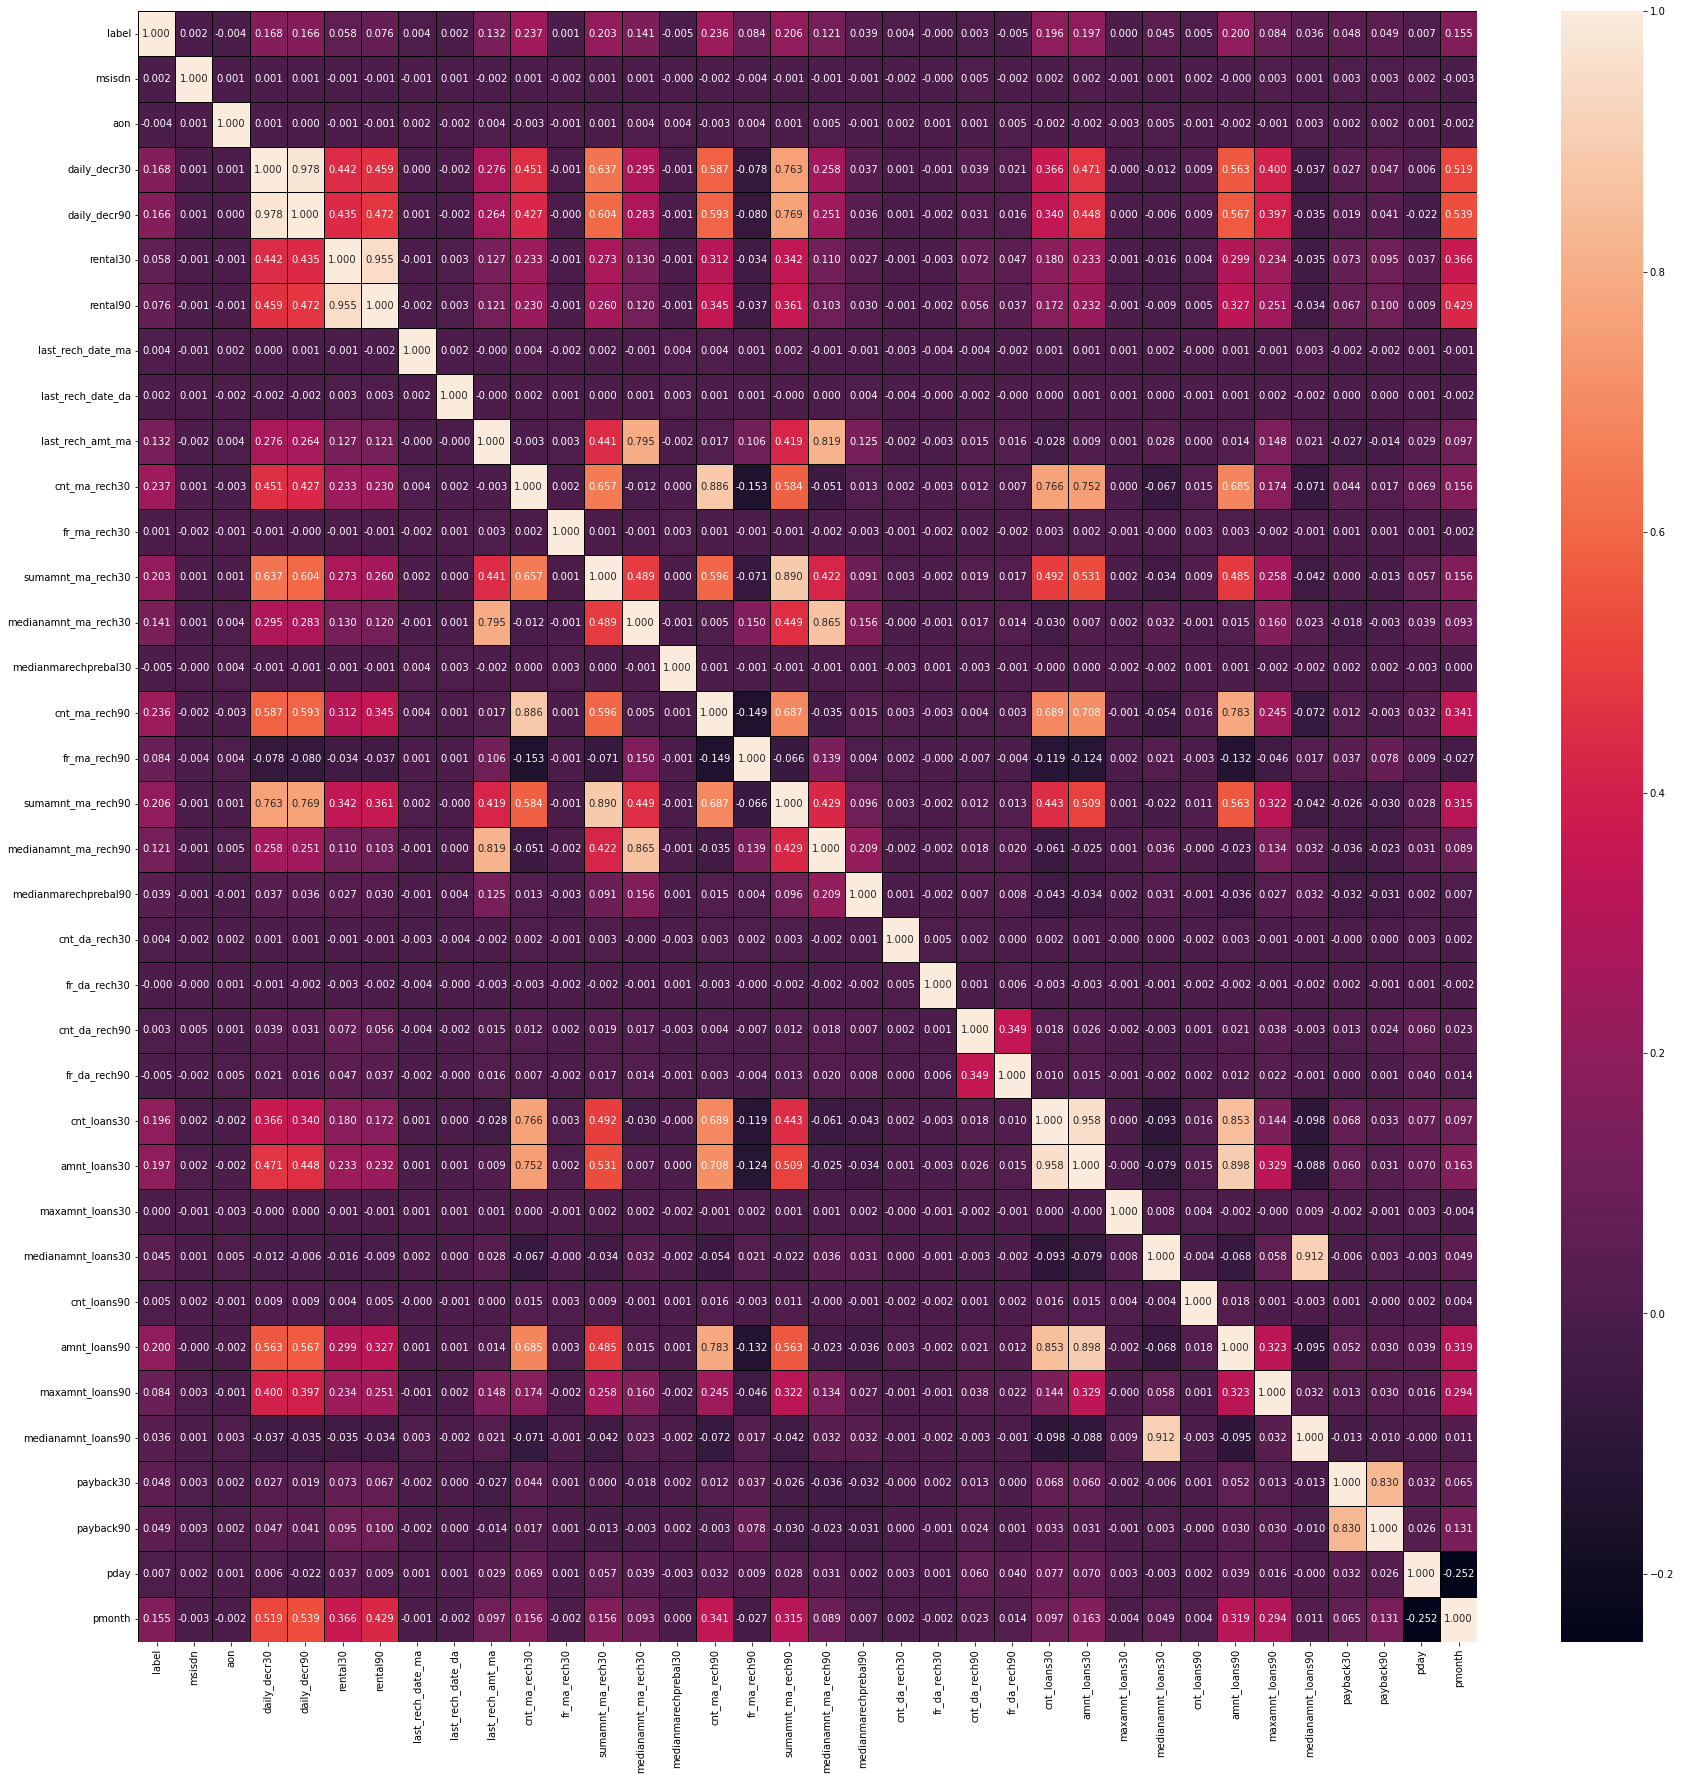

In [23]:
plt.figure(figsize=(30,30))
sns.heatmap(data.corr(),annot=True,linewidth=0.5,linecolor='black',fmt='0.3f')

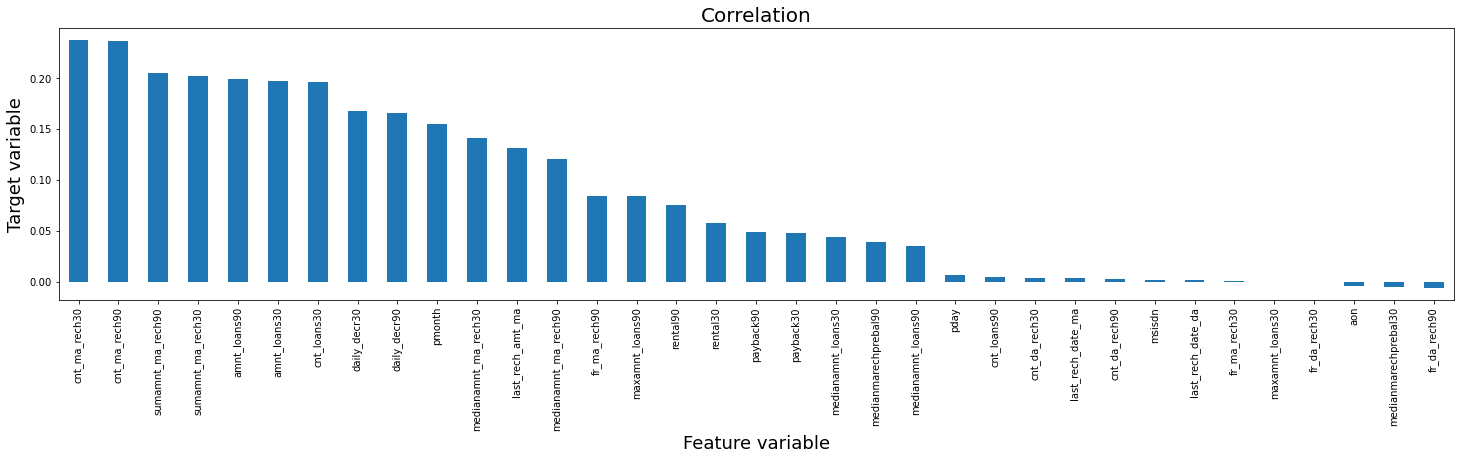

In [24]:
plt.figure(figsize=(25,5))
data.corr()['label'].sort_values(ascending=False).drop(['label']).plot(kind='bar')
plt.xlabel('Feature variable',fontsize=18)
plt.ylabel('Target variable',fontsize=18)
plt.title('Correlation',fontsize=20)
plt.show()

In two columns there is zero correlation with the target variable and also have unrelevant datas:
     * maxamnt_loans30  
     * fr_da_rech30 

In [25]:
data=data.drop(['maxamnt_loans30','fr_da_rech30'],axis=1)
data.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,amnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pday,pmonth
0,0,40191.0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,12,0.0,2.0,12,6,0.0,29.000000,29.000000,20,7
1,1,142291.0,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12,0.0,1.0,12,12,0.0,0.000000,0.000000,10,8
2,1,33594.0,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6,0.0,1.0,6,6,0.0,0.000000,0.000000,19,8
3,1,104157.0,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,12,0.0,2.0,12,6,0.0,0.000000,0.000000,6,6
4,1,6910.0,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,42,0.0,7.0,42,6,0.0,2.333333,2.333333,22,6


                                              Multicolinearity

<AxesSubplot:xlabel='daily_decr30', ylabel='daily_decr90'>

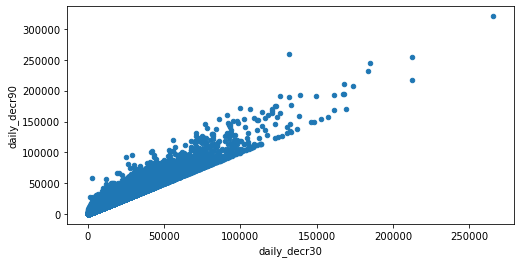

In [26]:
data.plot(kind='scatter',x='daily_decr30' , y='daily_decr90' ,figsize=(8,4))

Data is positively correlated so we drop daily_decr30 because have higher correlation

<AxesSubplot:xlabel='rental30', ylabel='rental90'>

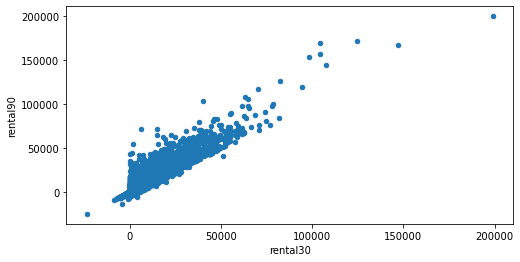

In [27]:
data.plot(kind='scatter',x='rental30' , y='rental90' ,figsize=(8,4))

Data is positively correlated so we drop them rental90

<AxesSubplot:xlabel='cnt_loans30', ylabel='amnt_loans30'>

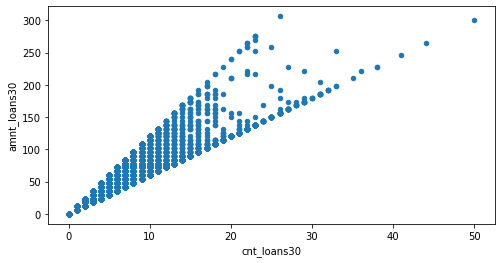

In [28]:
data.plot(kind='scatter',x='cnt_loans30' , y='amnt_loans30' ,figsize=(8,4))

Data is positively correlated so we drop amnt_loans30

<AxesSubplot:xlabel='medianamnt_loans30', ylabel='medianamnt_loans90'>

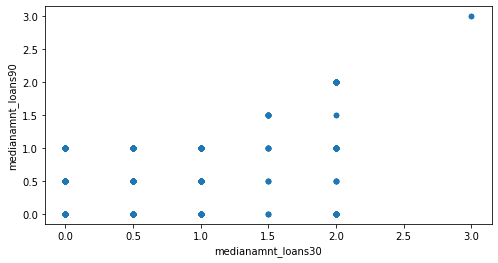

In [29]:
data.plot(kind='scatter',x='medianamnt_loans30' , y='medianamnt_loans90' ,figsize=(8,4))

Data is positively correlated so we drop medianamnt_loans30

In [30]:
data=data.drop(['daily_decr30','rental90','amnt_loans30','medianamnt_loans30'],axis=1)
data.head()

,label,msisdn,aon,daily_decr90,rental30,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,fr_da_rech90,cnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pday,pmonth
0,0,40191.0,272.0,3065.150000,220.13,2.0,0.0,1539,2,21.0,...,0,2,2.0,12,6,0.0,29.000000,29.000000,20,7
1,1,142291.0,712.0,12124.750000,3691.26,20.0,0.0,5787,1,0.0,...,0,1,1.0,12,12,0.0,0.000000,0.000000,10,8
2,1,33594.0,535.0,1398.000000,900.13,3.0,0.0,1539,1,0.0,...,0,1,1.0,6,6,0.0,0.000000,0.000000,19,8
3,1,104157.0,241.0,21.228000,159.42,41.0,0.0,947,0,0.0,...,0,2,2.0,12,6,0.0,0.000000,0.000000,6,6
4,1,6910.0,947.0,150.619333,1098.90,4.0,0.0,2309,7,2.0,...,0,7,7.0,42,6,0.0,2.333333,2.333333,22,6


                                         Outliers

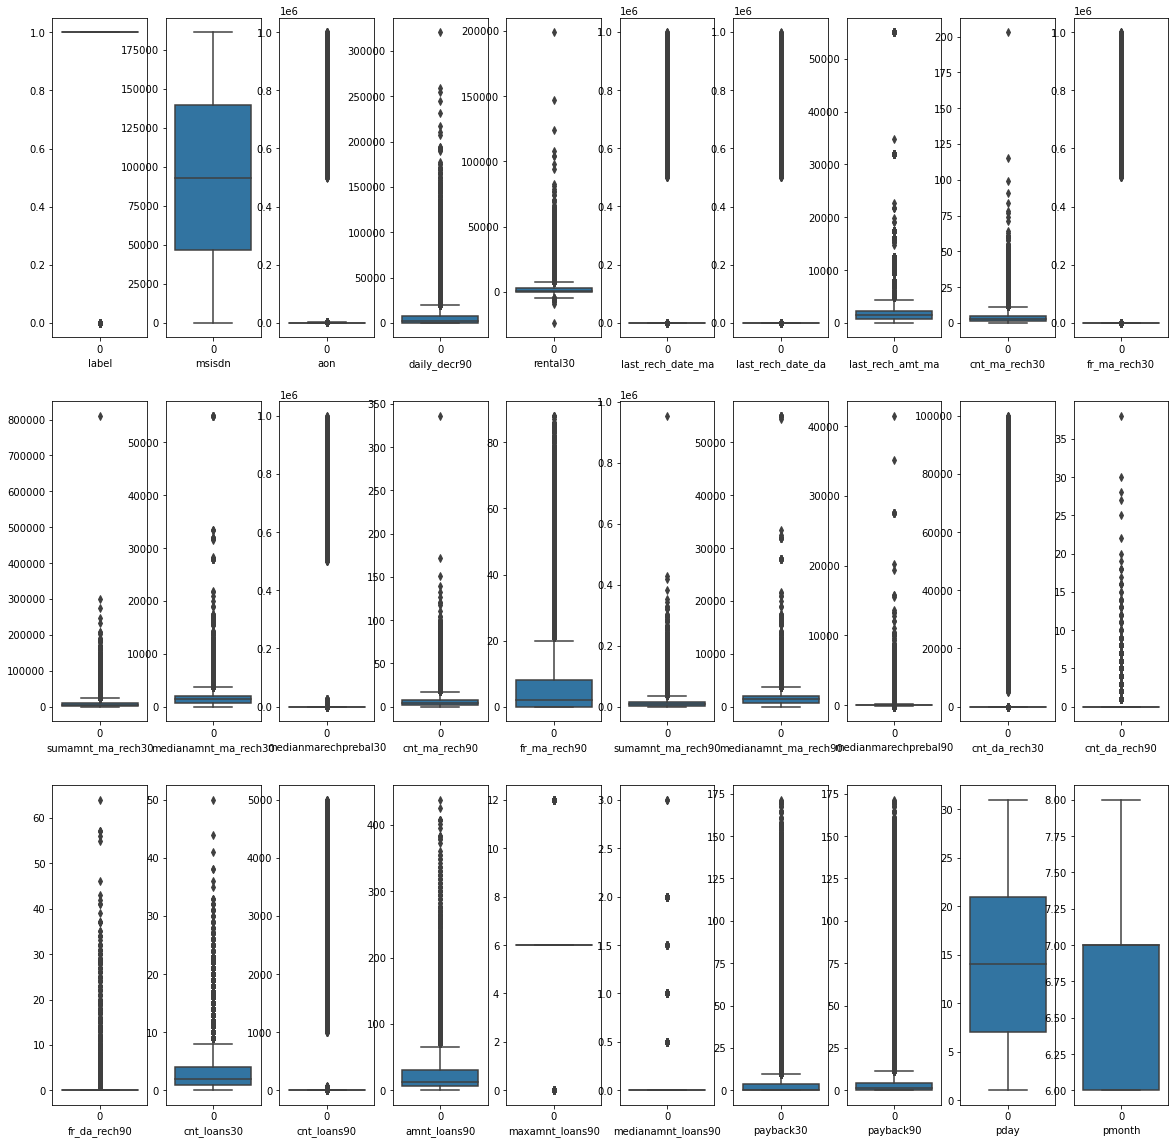

In [31]:
plt.figure(figsize=(20,20))
number = 1

for column in data:
    if number <=30:
        plt.subplot(3,10,number)
        ax = sns.boxplot(data=data[column])
        plt.xlabel(column,fontsize=10)
       
    number+=1
plt.show()    

                                        Skewness

In [32]:
data.skew()

label                   -2.270254
msisdn                   0.000719
aon                     10.392949
daily_decr90             4.252565
rental30                 4.521929
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
cnt_loans90             16.594408
amnt_loans90             3.150006
maxamnt_loans90          1.678304
medianamnt_loans90       4.895720
payback30                8.310695
payback90                6.899951
pday                     0.199845
pmonth        

                                        Removing outliers

In [33]:
x = data.drop(['label'],axis=1)
y = data['label']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [34]:
z=np.abs(zscore(x))

threshold=3

print(np.where(z>3))

(array([    21,     22,     22, ..., 209581, 209586, 209587], dtype=int64), array([13, 13, 26, ...,  2, 22, 24], dtype=int64))


In [35]:
data_new=data[(z<3).all(axis=1)]

In [36]:
print("Old data frame:",data.shape)
print("New data frame:",data_new.shape)
print("Total dropped rows:",data.shape[0]-data_new.shape[0])

Old data frame: (209593, 30)
New data frame: (165212, 30)
Total dropped rows: 44381


In [37]:
data_loss=(209593-165212)/209593*100
print(data_loss,'%')

21.17484839665447 %


If we do this so 21% data is loss,the data is expensive so we do not remove them.

# Model Testing

In [38]:
x = data.drop(['label'],axis=1)
y = data['label']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

                                    Balancing the imbalance data

In [39]:
!pip install imbalanced-learn

In [40]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [41]:
x_scaled.shape,y.shape

((209593, 29), (209593,))

In [42]:
Oversample=SMOTE(0.80)
x_scaled,y=Oversample.fit_resample(x_scaled,y)

In [43]:
x_scaled.shape,y.shape

((330175, 29), (330175,))

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size = 0.20,random_state =41)
print("The no. classes before fit {}".format(Counter(y_train)))

The no. classes before fit Counter({1: 146544, 0: 117596})


In [45]:
y_test.value_counts()

1    36887
0    29148
Name: label, dtype: int64

                                            Logistic Regression

In [48]:
lr=LogisticRegression()

In [49]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state = i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print("The model perform very well")
    print("random state",i)
    print("Training accuracy score:",accuracy_score(y_train,pred_train)*100)
    print("Testing accuracy score:",accuracy_score(y_test,pred_test)*100)
    print('\n')

The model perform very well
random state 0
Training accuracy score: 75.62391156205042
Testing accuracy score: 75.52055728023018


The model perform very well
random state 1
Training accuracy score: 75.57318088892254
Testing accuracy score: 75.66744908003331


The model perform very well
random state 2
Training accuracy score: 75.54743696524571
Testing accuracy score: 75.74165215416068


The model perform very well
random state 3
Training accuracy score: 75.60801090330885
Testing accuracy score: 75.69773604906489


The model perform very well
random state 4
Training accuracy score: 75.56788066934202
Testing accuracy score: 75.6750208222912


The model perform very well
random state 5
Training accuracy score: 75.52812902248807
Testing accuracy score: 75.6401908079049


The model perform very well
random state 6
Training accuracy score: 75.62391156205042
Testing accuracy score: 75.63413341409859


The model perform very well
random state 7
Training accuracy score: 75.53494359052017
Testin

In [50]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y, test_size=0.20,random_state=14) 

In [51]:
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)*100
print("accuracy score:",accuracy)

accuracy score: 75.70833648822594


In [52]:
cm= confusion_matrix(y_test,y_pred)
print(cm)

[[22105  7039]
 [ 9002 27889]]


In [53]:
clr=classification_report(y_test,y_pred)
print(clr)

              precision    recall  f1-score   support

           0       0.71      0.76      0.73     29144
           1       0.80      0.76      0.78     36891

    accuracy                           0.76     66035
   macro avg       0.75      0.76      0.76     66035
weighted avg       0.76      0.76      0.76     66035



                                            K  Neighbors Classifier

In [54]:
knn= KNeighborsClassifier()

In [55]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state = i)
    knn.fit(x_train,y_train)
    pred_train=knn.predict(x_train)
    pred_test=knn.predict(x_test)
    print("The model perform very well")
    print("random state",i)
    print("Training accuracy score:",accuracy_score(y_train,pred_train)*100)
    print("Testing accuracy score:",accuracy_score(y_test,pred_test)*100)
    print('\n')

The model perform very well
random state 0
Training accuracy score: 90.92223820701143
Testing accuracy score: 87.54751268266828


The model perform very well
random state 1
Training accuracy score: 90.92980994926933
Testing accuracy score: 87.32187476338305


The model perform very well
random state 2
Training accuracy score: 90.96994018323616
Testing accuracy score: 87.45816612402514


The model perform very well
random state 3
Training accuracy score: 90.90974483228591
Testing accuracy score: 87.45513742712198


The model perform very well
random state 4
Training accuracy score: 90.90103732868933
Testing accuracy score: 87.37033391383358


The model perform very well
random state 5
Training accuracy score: 90.88513666994776
Testing accuracy score: 87.35216173241463


The model perform very well
random state 6
Training accuracy score: 90.92110244567276
Testing accuracy score: 87.62625880215037


The model perform very well
random state 7
Training accuracy score: 90.88097221170591
Test

In [56]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled, y, test_size=0.20,random_state=97) 

In [57]:
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)*100
print("accuracy score:",accuracy)

accuracy score: 87.45816612402514


In [58]:
cm= confusion_matrix(y_test,y_pred)
print(cm)

[[28660   778]
 [ 7504 29093]]


In [59]:
clr=classification_report(y_test,y_pred)
print(clr)

              precision    recall  f1-score   support

           0       0.79      0.97      0.87     29438
           1       0.97      0.79      0.88     36597

    accuracy                           0.87     66035
   macro avg       0.88      0.88      0.87     66035
weighted avg       0.89      0.87      0.87     66035



                                    Random Forest Classifier

In [60]:
rfc=RandomForestClassifier()

In [61]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state = i)
    rfc.fit(x_train,y_train)
    pred_train=rfc.predict(x_train)
    pred_test=rfc.predict(x_test)
    print("The model perform very well")
    print("random state",i)
    print("Training accuracy score:",accuracy_score(y_train,pred_train)*100)
    print("Testing accuracy score:",accuracy_score(y_test,pred_test)*100)
    print('\n')

The model perform very well
random state 0
Training accuracy score: 99.99924282577422
Testing accuracy score: 94.57106080109034


The model perform very well
random state 1
Training accuracy score: 99.99924282577422
Testing accuracy score: 94.89967441508291


The model perform very well
random state 2
Training accuracy score: 99.99848565154842
Testing accuracy score: 94.69675172257136


The model perform very well
random state 3
Training accuracy score: 99.99848565154842
Testing accuracy score: 94.84212917392291


The model perform very well
random state 4
Training accuracy score: 99.99924282577422
Testing accuracy score: 94.67100779889452


The model perform very well
random state 5
Training accuracy score: 99.99848565154842
Testing accuracy score: 94.75126826682819


The model perform very well
random state 6
Training accuracy score: 99.99810706443553
Testing accuracy score: 94.72098129779663


The model perform very well
random state 7
Training accuracy score: 99.99810706443553
Test

In [62]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y, test_size=0.20,random_state=57)

In [63]:
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)*100
print("accuracy score:",accuracy)

accuracy score: 95.01173620049973


In [64]:
cm= confusion_matrix(y_test,y_pred)
print(cm)

[[27638  1749]
 [ 1545 35103]]


In [65]:
clr=classification_report(y_test,y_pred)
print(clr)

              precision    recall  f1-score   support

           0       0.95      0.94      0.94     29387
           1       0.95      0.96      0.96     36648

    accuracy                           0.95     66035
   macro avg       0.95      0.95      0.95     66035
weighted avg       0.95      0.95      0.95     66035



                                           Decision Tree Classifier

In [66]:
clf=DecisionTreeClassifier()

In [67]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state = i)
    clf.fit(x_train,y_train)
    pred_train=clf.predict(x_train)
    pred_test=clf.predict(x_test)
    print("The model perform very well")
    print("random state",i)
    print("Training accuracy score:",accuracy_score(y_train,pred_train)*100)
    print("Testing accuracy score:",accuracy_score(y_test,pred_test)*100)
    print('\n')

The model perform very well
random state 0
Training accuracy score: 99.99924282577422
Testing accuracy score: 90.45809040660255


The model perform very well
random state 1
Training accuracy score: 99.99924282577422
Testing accuracy score: 90.36420080260467


The model perform very well
random state 2
Training accuracy score: 99.99848565154842
Testing accuracy score: 90.21579465434996


The model perform very well
random state 3
Training accuracy score: 99.99848565154842
Testing accuracy score: 90.43537517982888


The model perform very well
random state 4
Training accuracy score: 99.99924282577422
Testing accuracy score: 90.40205951389414


The model perform very well
random state 5
Training accuracy score: 99.99848565154842
Testing accuracy score: 90.43688952828046


The model perform very well
random state 6
Training accuracy score: 99.99886423866131
Testing accuracy score: 90.25971075944574


The model perform very well
random state 7
Training accuracy score: 99.99848565154842
Test

In [68]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y, test_size=0.20,random_state=30) 

In [69]:
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)*100
print("accuracy score:",accuracy)

accuracy score: 90.33088513666995


In [70]:
cm= confusion_matrix(y_test,y_pred)
print(cm)

[[26261  2989]
 [ 3396 33389]]


In [71]:
clr=classification_report(y_test,y_pred)
print(clr)

              precision    recall  f1-score   support

           0       0.89      0.90      0.89     29250
           1       0.92      0.91      0.91     36785

    accuracy                           0.90     66035
   macro avg       0.90      0.90      0.90     66035
weighted avg       0.90      0.90      0.90     66035



The better model we get for the dataset is Random Forest Classifier. Now, hyper parameter tuning is applied to increase the accuracy 

# Random Forest Classifier

                                         Hyper Parameter Tuning

In [72]:
rfc=RandomForestClassifier()

In [73]:
parameters={'max_features':['auto','sqrt'],
            'max_depth': range(2,100),
            'criterion':['gini','entropy '],
            'min_samples_split':range(2,10)}

In [81]:
GCV=GridSearchCV(rfc,parameters,n_jobs=-1)
GCV.fit(x_train,y_train) 
GCV.best_params_

{'min_samples_split': 2,
 'max_features': 'auto',
 'max_depth': 45,
 'criterion': 'gini'}

In [84]:
clf = RandomForestClassifier(min_samples_split=2,criterion='gini',max_features='auto',max_depth=45)
clf.fit(x_train,y_train) 
y_pred = clf.predict(x_test)
accuracy_score(y_test,y_pred)*100

94.83758612856819

In [85]:
cm= confusion_matrix(y_test,y_pred)
print(cm)

[[27341  1909]
 [ 1500 35285]]


In [86]:
clr=classification_report(y_test,y_pred)
print(clr)

              precision    recall  f1-score   support

           0       0.95      0.93      0.94     29250
           1       0.95      0.96      0.95     36785

    accuracy                           0.95     66035
   macro avg       0.95      0.95      0.95     66035
weighted avg       0.95      0.95      0.95     66035



                                       Plot roc curve with roc_auc score

In [87]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred)

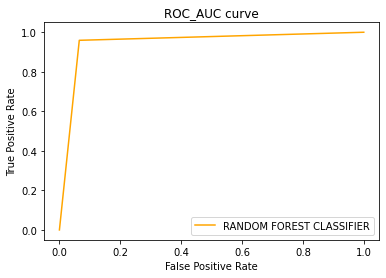

AUC_score 94.69787759549891


In [88]:
plt.plot(fpr,tpr,color='orange',label='RANDOM FOREST CLASSIFIER')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_AUC curve')
plt.legend()                                                                                 
plt.show()

auc_score = roc_auc_score(y_test,y_pred)*100
print("AUC_score",auc_score)

                                             Conclusion

In [89]:
Prediction=pd.DataFrame({'Actual data':y_test,"Predicted data":y_pred})
Prediction

,Actual data,Predicted data
39189,1,1
44685,1,1
275984,0,0
208273,1,1
125146,1,1
...,...,...
295506,0,0
300173,0,0
318324,0,0
1798,1,1
